In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [19]:
data = pd.read_csv("Forest_Fires_Area.csv")
data["day"].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', nan, 'thu'], dtype=object)

In [20]:
month_mapping = {"jan": 1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
day_mapping = {"mon":1,"tue":2,"wed":3,"thu":4,"fri":5,"sat":6,"sun":7}
data["month"] = data["month"].map(month_mapping)
data["day"] = data["day"].map(day_mapping)

In [118]:
data.describe()

,coordinate_x,coordinate_y,month,day,moisture_shade,moisture_litter,soil_dryness,spread_rate,temperature,humidity,wind(kmh),rain(mm),area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.292070,90.644681,110.872340,547.940039,9.021663,18.889168,44.309195,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.078357,5.520111,64.046482,248.066192,4.559477,5.806625,16.293661,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [94]:
data.isnull().sum()

coordinate_x       0
coordinate_y       0
month              0
day                0
moisture_shade     0
moisture_litter    0
soil_dryness       0
spread_rate        0
temperature        0
humidity           2
wind(kmh)          0
rain(mm)           0
area               0
dtype: int64

In [61]:
data["day"] = data["day"].fillna(7)
data["day"].mode()

0    7.0
Name: day, dtype: float64

In [108]:
average_humidity = data.groupby(["month","day"])["humidity"].mean()
average_humidity

month  day
1      6.0     78.000000
       7.0    100.000000
2      1.0     59.666667
       2.0     79.500000
       3.0     35.000000
                 ...    
12     2.0     24.000000
       3.0     61.000000
       4.0     61.000000
       5.0     59.000000
       7.0     57.000000
Name: humidity, Length: 64, dtype: float64

In [113]:
for index in data[data["humidity"].isnull()].index:
    month = data.loc[index,"month"]
    day = data.loc[index,"day"]
    
    print(month,day)
    
    humidity_in_day = average_humidity.loc[(month,day)]
    
    print(humidity_in_day)
    
    print("Data in iloc before:", data["humidity"].iloc[index])
    
    data["humidity"].iloc[index] = humidity_in_day

    print("Data in iloc after:", data["humidity"].iloc[index])

coordinate_x       0
coordinate_y       0
month              0
day                0
moisture_shade     0
moisture_litter    0
soil_dryness       0
spread_rate        0
temperature        0
humidity           0
wind(kmh)          0
rain(mm)           0
area               0
dtype: int64

<Axes: >

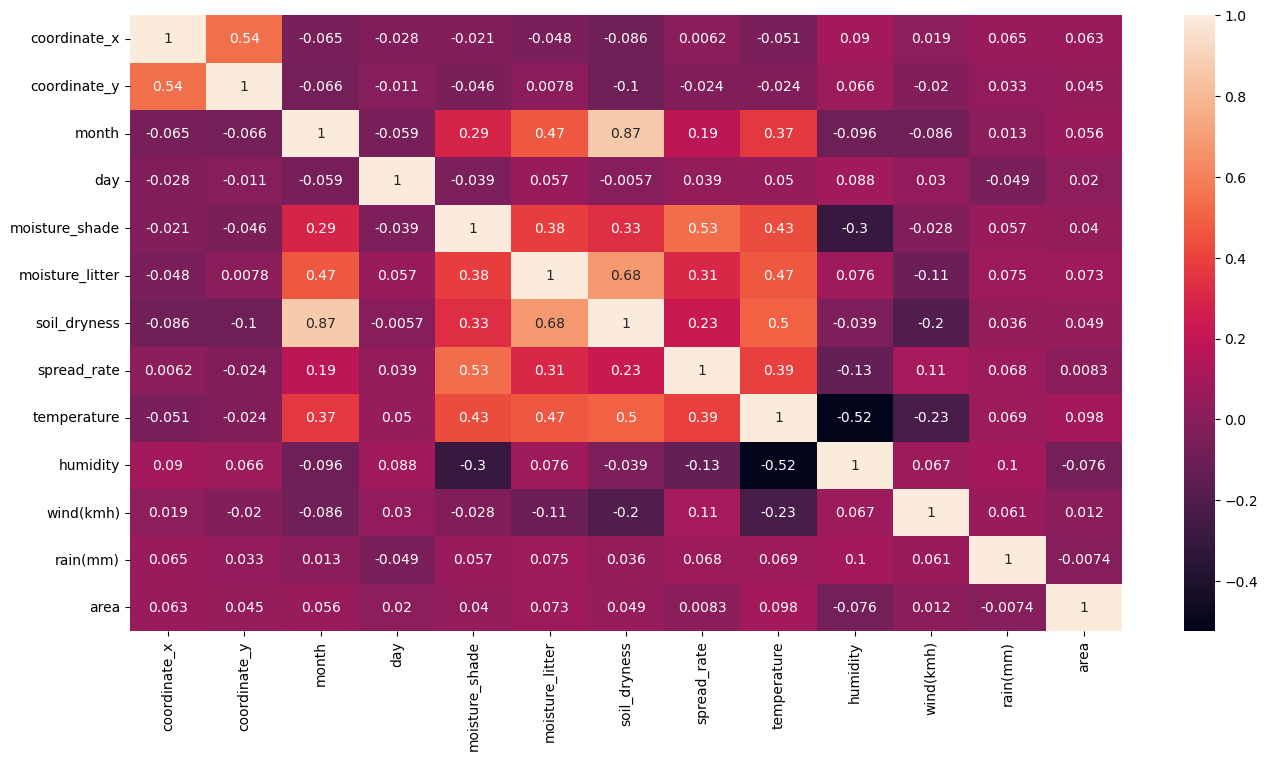

In [120]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True)

In [114]:
from sklearn.model_selection import train_test_split

lr = LinearRegression()

X_train,X_test,y_train,y_test = train_test_split(data.drop(columns="area",axis=1),data["area"],test_size=0.3,random_state=1)

lr.fit(X_train,y_train)

LinearRegression()

In [116]:
from sklearn import metrics

y_predict = lr.predict(X_test)

print(metrics.mean_squared_error(y_test, y_predict))



3937.7080221087253
